In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'

df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [2]:
df.shape

(768, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Todas las variebles son numéricas aunque la variable independiente es binaria asique es categórica a efectos prácticos

In [5]:
df.duplicated().sum()

np.int64(0)

No hay duplicados y a priori todas las variables me parece que pueden tener su relevancia en la predicción asique no voy a eliminar ninguna

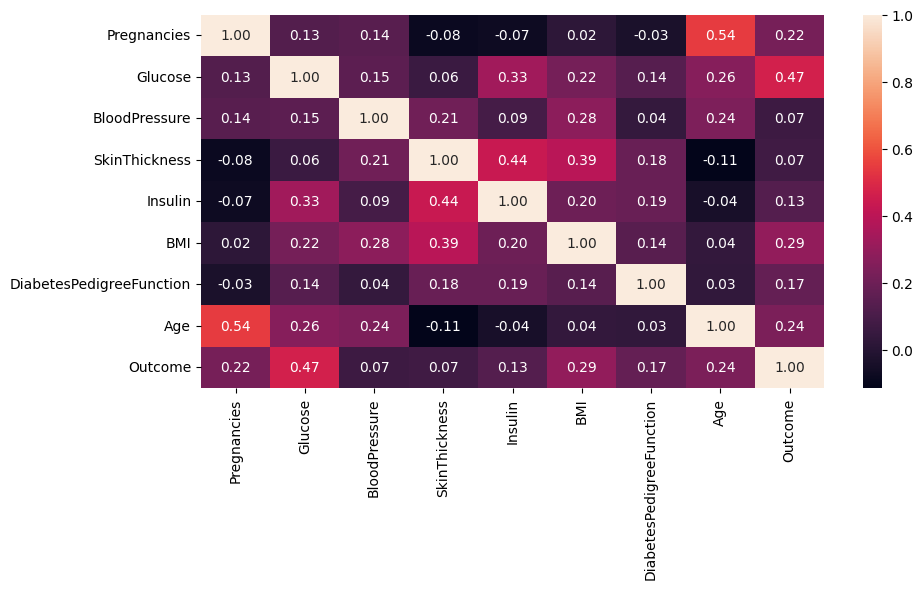

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

La variable 'Glucose' parece ser la variable más influyente en la predicción aunque hay que tener en cuenta que esta matriz solo refleja relaciones lineales

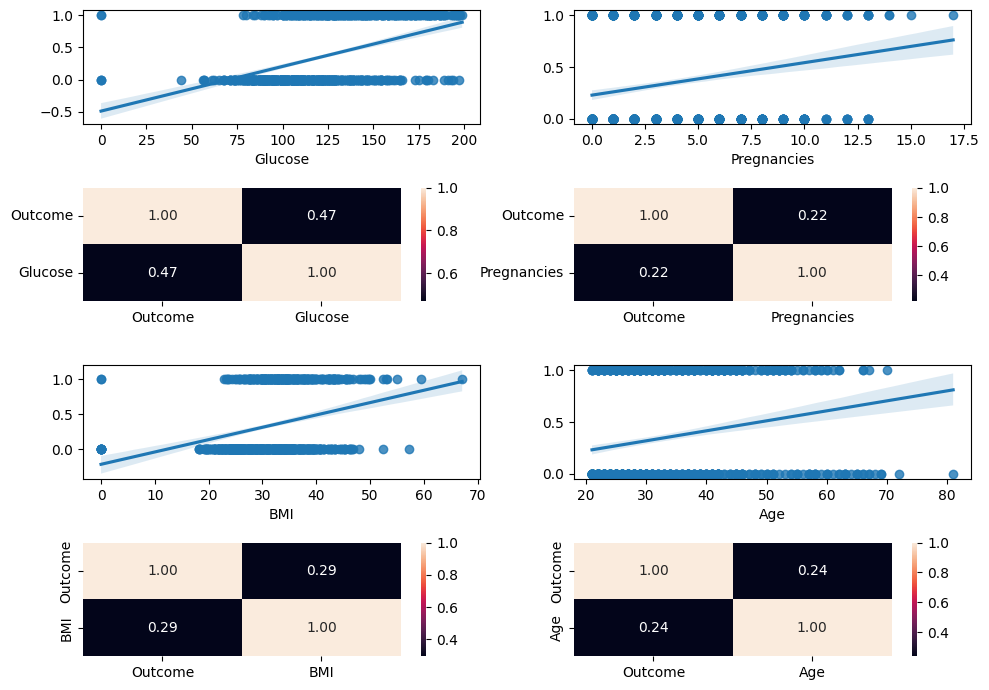

In [9]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = df, x = "Glucose", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0])
sns.regplot(ax = axis[0, 1], data = df, x = "Pregnancies", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = df, x = "BMI", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])
sns.regplot(ax = axis[2, 1], data = df, x = "Age", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

plt.tight_layout()
plt.show()

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Parece haber outliers en todas las columnas, no obstante los que más me llaman la atención son aquellos de las variables que más peso tienen en la predicción. 17 embarazos me parecen muchsiimos, por otro lado creo que la edad media sea de 33 años me parece un fallo en la recolección de datos, pero contra eso no puedo hacer nada. Voy a revisar más en detalle algunos de estos Outliers para decidir que hacer con ellos.

In [21]:
df.loc[df['Pregnancies'] > 10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
24,11,143,94,33,146,36.6,0.254,51,1
28,13,145,82,19,110,22.2,0.245,57,0
36,11,138,76,0,0,33.2,0.420,35,0
72,13,126,90,0,0,43.4,0.583,42,1
86,13,106,72,54,0,36.6,0.178,45,0
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
193,11,135,0,0,0,52.3,0.578,40,1
215,12,151,70,40,271,41.8,0.742,38,1
254,12,92,62,7,258,27.6,0.926,44,1


In [22]:
df.loc[df['Age'] > 60]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
115,4,146,92,0,0,31.2,0.539,61,1
123,5,132,80,0,0,26.8,0.186,69,0
129,0,105,84,0,0,27.9,0.741,62,1
148,5,147,78,0,0,33.7,0.218,65,0
221,2,158,90,0,0,31.6,0.805,66,1
223,7,142,60,33,190,28.8,0.687,61,0
263,3,142,80,15,0,32.4,0.200,63,0
294,0,161,50,0,0,21.9,0.254,65,0
361,5,158,70,0,0,29.8,0.207,63,0
362,5,103,108,37,0,39.2,0.305,65,0


Me parece increible que haya más personas en el dataset con más de 10 embarazos que personas con más de 60 años y que solo haya una persona de 80 años pero comparando el número de embarazos con la edad parecen ser todos datos correctos, asique de momento no voy a eliminar nada. Sería interesante ver en que población se tomaron estos datos, pero eso escapa del objetivo de este proyecto.

Voy a revisar ahora los outliers por la parte baja, ya que he observado varias columnas con mínimos de 0 lo cual es imposible en ciertas métricas por lo que asumo que aunque no había valores nulos en el dataset estos valores de 0 corresponden a falta de información.

In [27]:
df.loc[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [29]:
df.loc[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


Estos datos que tienen 0 tanto en la 'Glucosa' como en 'BMI' si que los voy a eliminar, primero porque se observa que tienen además falta de datos en otras columnas, segundo porque aunque la mayoría tienen un Outcome de 0 los hay que no, por lo que creo que ensucian los datos.

In [42]:
print(f"Null data Insulin {df['Insulin'].loc[df['Insulin'] == 0].count()/len(df) * 100}")
print(f"Null data Blood pressure {df['BloodPressure'].loc[df['BloodPressure'] == 0].count()/len(df) * 100}")
print(f"Null data skin {df['SkinThickness'].loc[df['SkinThickness'] == 0].count()/len(df) * 100}")

Null data Insulin 48.69791666666667
Null data Blood pressure 4.557291666666666
Null data skin 29.557291666666668


Casi la mitad de los datos de Insulina son nulos, me extrañaba que esta variable no tuviese más influencia, ahora me sorprende que tenga una influencia de 0.13, probablemente en caso de tener todos los datos sería la variable más influyente, pero en esta caso la voy a eliminar. Por otro lado faltan casi el 30% de los datos en la variable del grosor de la piel, como además no parece tener mucho impacto voy a eliminarla completamente.

In [45]:
procesed_data = df.drop(['Insulin','SkinThickness'], axis=1)
procesed_data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


# Machine Learning

In [83]:
from sklearn.model_selection import train_test_split

num_variables = ['Pregnancies', 'Glucose', 'BloodPressure','BMI', 'DiabetesPedigreeFunction', 'Age']

X = procesed_data.drop("Outcome", axis = 1)[num_variables]
y = procesed_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) #Usar la escala del training tanto para el training como para el test

X_train_norm = scaler.transform(X_train) 
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables) #Convertir los datos de nuevo en dataframe

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

En este caso al no tener demasiadas variables voy a coger todas las que quedan

<Axes: >

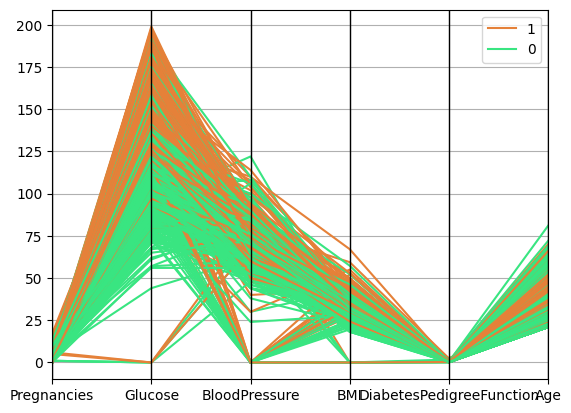

In [51]:
total_data = X
total_data["Name"] = y

pd.plotting.parallel_coordinates(total_data, "Name", color = ("#E58139", "#39E581", "#8139E5"))

In [73]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_norm, y_train)

DecisionTreeClassifier(random_state=42)

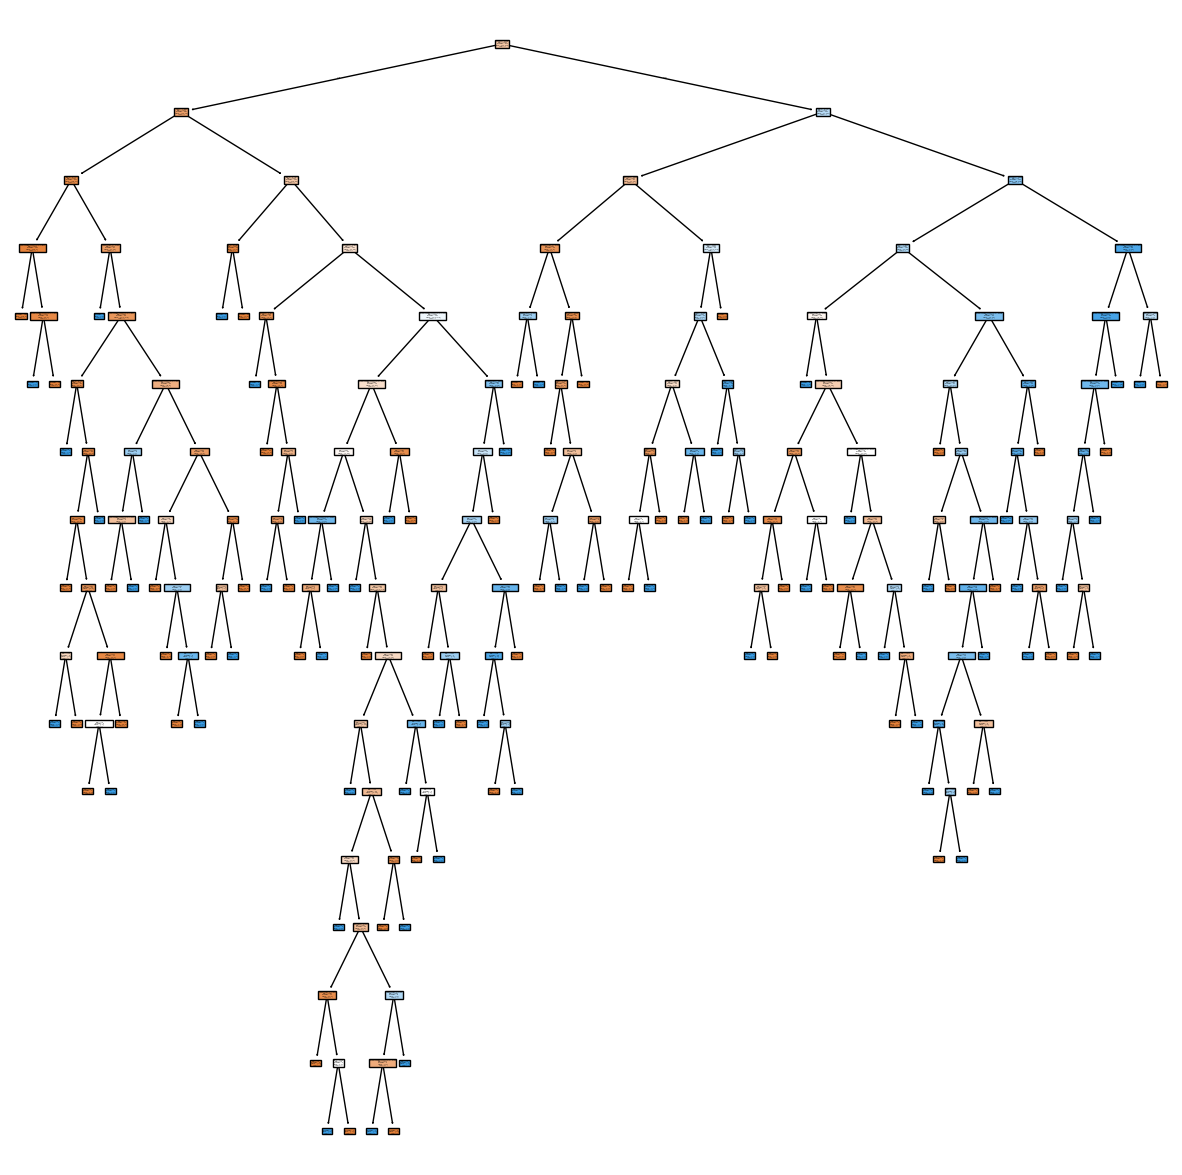

In [66]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [76]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_norm)
accuracy_score(y_pred, y_test)

0.7272727272727273

Parece una accuracy un poco baja, voy a hacer algunas pruebas como en proyectos anteriores.

# Linear Regression model

In [77]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 0.1691242723446468
Coefficient of determination: 0.26336983600998254


Mucho peor con este modelo

# Raw Data

In [100]:
num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df.drop("Outcome", axis = 1)[num_variables]
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train) #Usar la escala del training tanto para el training como para el test

X_train_norm = scaler.transform(X_train) 
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables) #Convertir los datos de nuevo en dataframe

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

model_raw = DecisionTreeClassifier(random_state = 42)
model_raw.fit(X_train_norm, y_train)

y_pred = model_raw.predict(X_test_norm)
accuracy_score(y_pred, y_test)

0.7467532467532467

Ligeramente mejor

In [87]:
df.shape

(768, 9)

# Menos Variables

In [103]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

selection_model = SelectKBest(mutual_info_regression, k = 4)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test.columns.values[ix])

X_train_sel.head()

,Glucose,Insulin,BMI,Age
0,-1.151398,-0.701206,-4.135256,-1.035940
1,-0.276643,-0.701206,-0.489169,1.487101
2,0.566871,0.013448,-0.424522,-0.948939
3,1.254179,-0.701206,-1.303720,2.792122
4,0.410665,2.484601,1.838121,1.139095


In [104]:
model_3 = DecisionTreeClassifier(random_state = 42)
model_3.fit(X_train_sel, y_train)

y_pred = model_3.predict(X_test_sel)
accuracy_score(y_pred, y_test)

0.6818181818181818

Peor incluso, se podría intentar alguna cosa más pero creo que así está bien, siento que los datos no eran todo lo representativos que debieran ser y aparte predecir la diabetes con más de un 70% de probabilidad en realidad es mucho